# Model Iterations - take 5

In this notebook, I use the same features from model 14 expect this time I will use the transformed data as per my discoveries in the `feature_vis1_lc` notebook.

## Imports and loading files:

In [17]:
# imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.modeling import modeling_functions as mf

In [5]:
df = pd.read_csv('../leana_m5')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,z_twnshp_21,z_twnshp_22,z_twnshp_23,z_twnshp_24,z_twnshp_25,z_twnshp_26,sqrt_totlivingsqft,sqrt_porch_size,sqrt_deck_size,log_buildinggrade
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,-0.35385,-0.369899,-0.419483,-0.506685,1.950743,-0.484802,51.672043,9.486833,0.000000,2.828427
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583,55.946403,7.071068,9.486833,2.645751
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583,38.340579,7.071068,20.248457,2.645751
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583,44.944410,0.100000,16.124515,2.645751
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,-0.35385,-0.369899,-0.419483,1.973505,-0.512597,-0.484802,47.222876,0.100000,17.606817,2.828427


# Model 19

The features I used in model 14 were:

In [24]:
features14 = ['z_saleprice', 
              'z_squarefeettotalliving', 'z_bathtotcount', 'z_squarefeetdeck', 'z_sqftporch', 
              'z_bldgr_3', 'z_bldgr_4', 'z_bldgr_5', 'z_bldgr_6', 'z_bldgr_7', 'z_bldgr_8', 'z_bldgr_9', 'z_bldgr_10', 'z_bldgr_11', 'z_bldgr_12', 
              'z_twnshp_20', 'z_twnshp_21', 'z_twnshp_22', 'z_twnshp_23', 'z_twnshp_24', 'z_twnshp_25', 'z_twnshp_26']

For this model, we won't use the z-score values to begin with.  We'll use the 'normal data' and then change everything to z-scores as necessary if it is a successful model. 

From my earlier explorations, I am now going to use:
- z score saleprice
- square root transformed total living sqft
- z score bathtotcount
- square root transformed porch size
- square root transformed deck size
- z score regulare building grade variables (might try log later...)
- z score regulare township variables

In [25]:
features19 = ['z_saleprice', 
              'sqrt_totlivingsqft', 'sqrt_porch_size', 'sqrt_deck_size', 
              'z_bathtotcount',  
              'z_bldgr_3', 'z_bldgr_4', 'z_bldgr_5', 'z_bldgr_6', 'z_bldgr_7', 'z_bldgr_8', 'z_bldgr_9', 'z_bldgr_10', 'z_bldgr_11', 'z_bldgr_12', 
              'z_twnshp_20', 'z_twnshp_21', 'z_twnshp_22', 'z_twnshp_23', 'z_twnshp_24', 'z_twnshp_25', 'z_twnshp_26']

In [16]:
model19 = mf.model(features19, df, 'z_saleprice')

                            OLS Regression Results                            
Dep. Variable:            z_saleprice   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2036.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:27:09   Log-Likelihood:                -14777.
No. Observations:               18169   AIC:                         2.960e+04
Df Residuals:                   18147   BIC:                         2.977e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.8768      0

In [10]:
def normality_assumption(model):
    # plot normality assumption
    fig, ax = plt.subplots(figsize = (15, 10))
    figure = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax = ax);
    ax.set_title('QQ-Plot of Residuals', fontsize = 25)
    return plt.show()

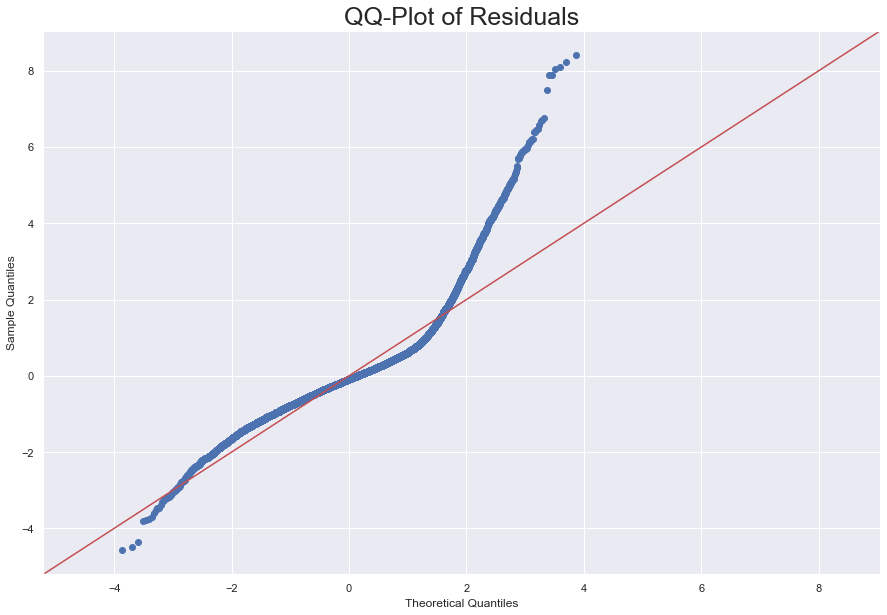

In [18]:
normality_assumption(model19)

#### Compare with Model 14:

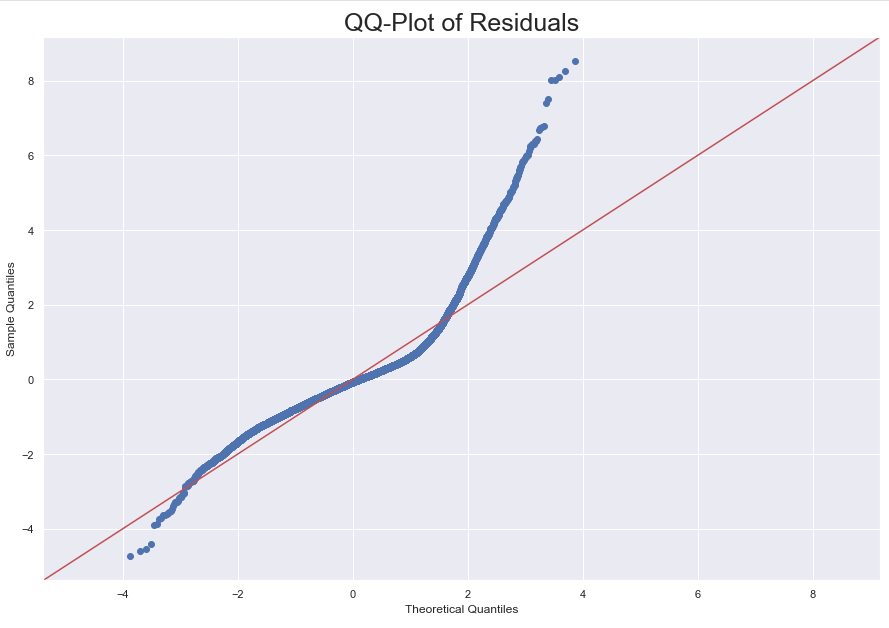

While very much the same, there has been a reduction in steepness at the high end.  You can see this when you look at x = 3 on model 19, y $\approx$ 5, where as at x = 3 on model 14, y $\approx$ 6.  So this show a decrease in the gradient with model 19.  The lower values in model 19 also hug the line a little more closely and we have 3 outliers trailing off.  Whereas in model 14, we had about 4 outliers at the bottom near x = -4 and the rest of the values pointed 'downwards' towards y = -4.  Over all, I think model 19 is a slightly better fit.  

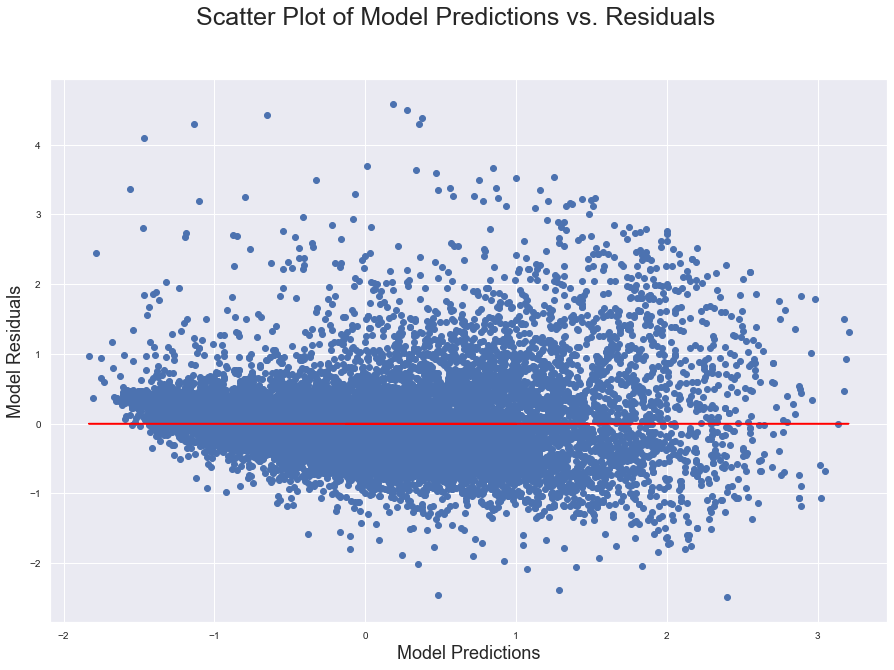

In [19]:
mf.homo_assumption(model19, df)

#### Compare with model 14:

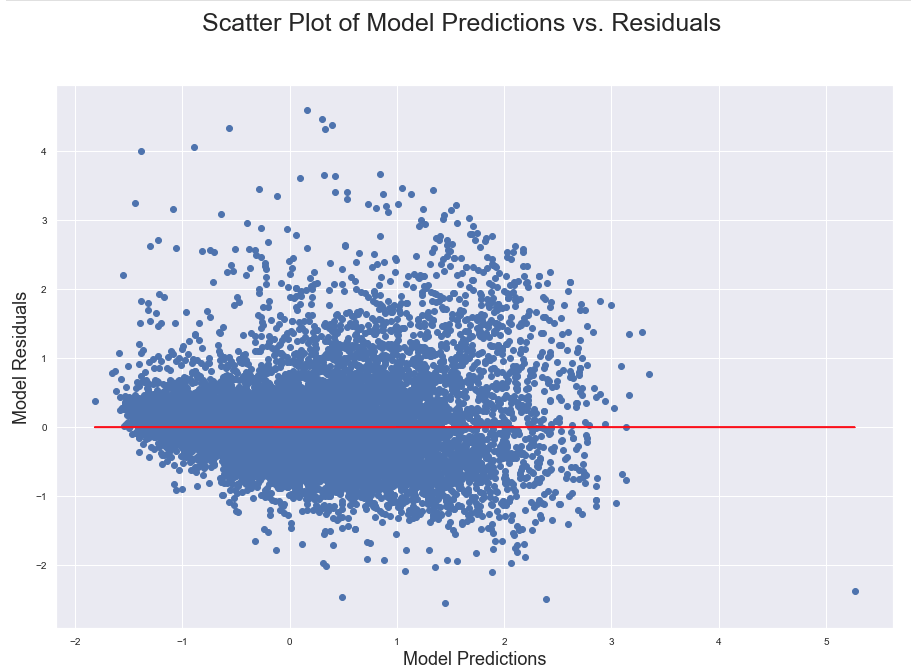

Notice the difference in scales between these two scatter plots.  Recall that we removed one outlier for the data in model 19.  This would explain the value in model 14 where x $\approx$ 5.5 - this has now been removed in model 19.  There is a slight coning shape at lower x values however apart from that, it appears to be scattered somewhat randomly about 0.  With this in mind, these plots are very similar and i would say the homoscadecisity assumption holds fairly well.  

# Model 20

In [20]:
to_z = ['sqrt_totlivingsqft', 'sqrt_porch_size', 'sqrt_deck_size']

In [22]:
for feature in to_z:
    mf.z_score(feature, df)

In [23]:
features20 = ['z_saleprice', 
              'z_sqrt_totlivingsqft', 'z_sqrt_porch_size', 'z_sqrt_deck_size', 
              'z_bathtotcount',  
              'z_bldgr_3', 'z_bldgr_4', 'z_bldgr_5', 'z_bldgr_6', 'z_bldgr_7', 'z_bldgr_8', 'z_bldgr_9', 'z_bldgr_10', 'z_bldgr_11', 'z_bldgr_12', 
              'z_twnshp_20', 'z_twnshp_21', 'z_twnshp_22', 'z_twnshp_23', 'z_twnshp_24', 'z_twnshp_25', 'z_twnshp_26']

In [26]:
model20 = mf.model(features20, df, 'z_saleprice')

                            OLS Regression Results                            
Dep. Variable:            z_saleprice   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2036.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:35:38   Log-Likelihood:                -14777.
No. Observations:               18169   AIC:                         2.960e+04
Df Residuals:                   18147   BIC:                         2.977e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0001 

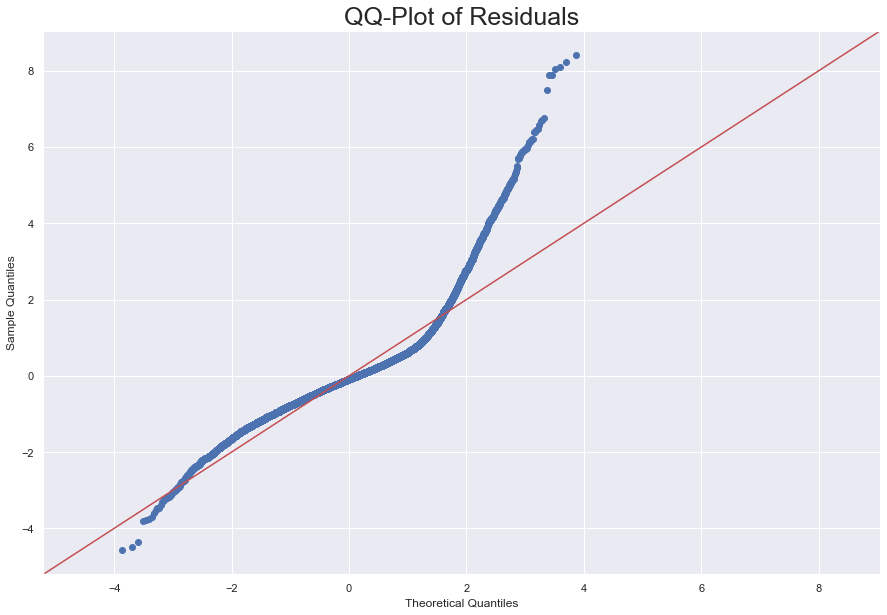

In [27]:
normality_assumption(model20)

#### Compare with model 19:

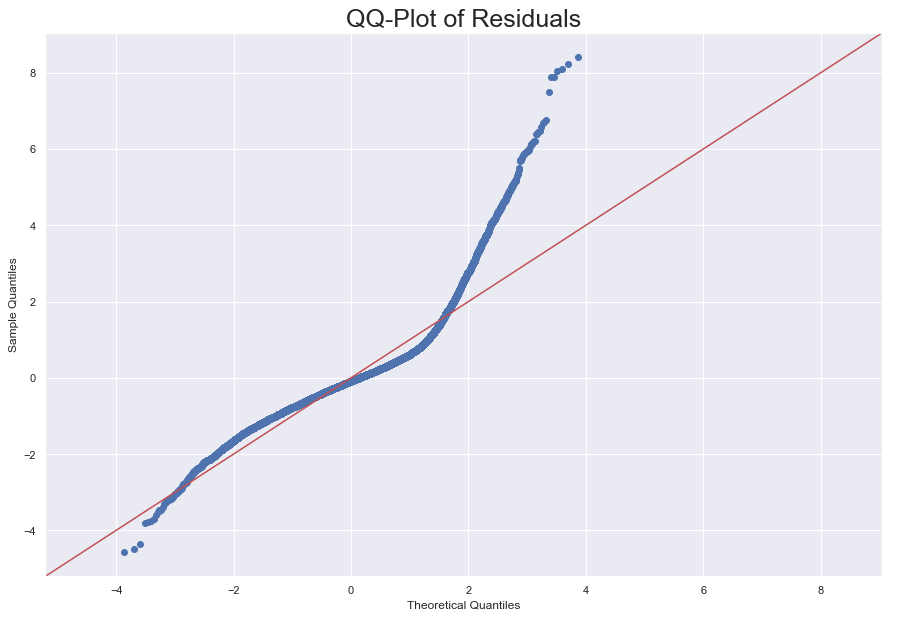

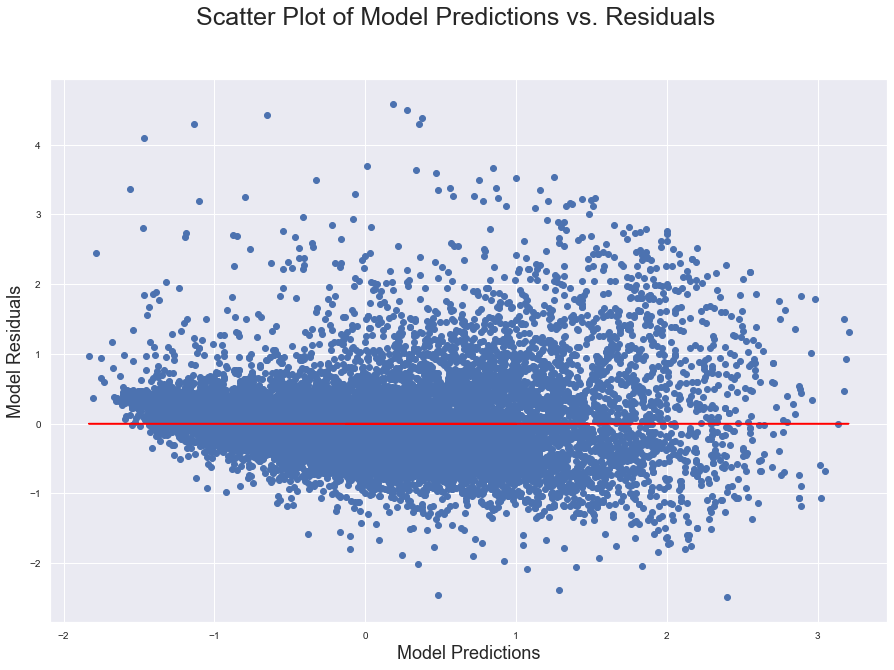

In [29]:
mf.homo_assumption(model20, df)

#### Compare with model 19:

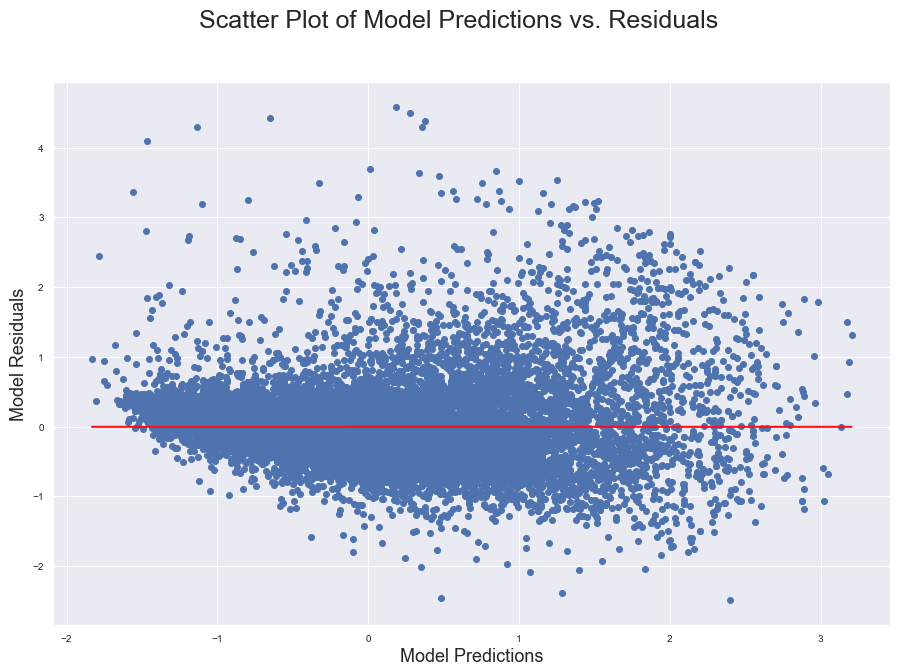

Model 19 and 20 yield the same results although we will stick with model 20 since the coefficients are easier to interpret with the z-scores.

In [30]:
copy = features20.copy()
copy.remove('z_saleprice')
x_features20 = copy
x_features20

['z_sqrt_totlivingsqft',
 'z_sqrt_porch_size',
 'z_sqrt_deck_size',
 'z_bathtotcount',
 'z_bldgr_3',
 'z_bldgr_4',
 'z_bldgr_5',
 'z_bldgr_6',
 'z_bldgr_7',
 'z_bldgr_8',
 'z_bldgr_9',
 'z_bldgr_10',
 'z_bldgr_11',
 'z_bldgr_12',
 'z_twnshp_20',
 'z_twnshp_21',
 'z_twnshp_22',
 'z_twnshp_23',
 'z_twnshp_24',
 'z_twnshp_25',
 'z_twnshp_26']

Text(0.5, 1, 'Heat Map of Feature Multicollinearity')

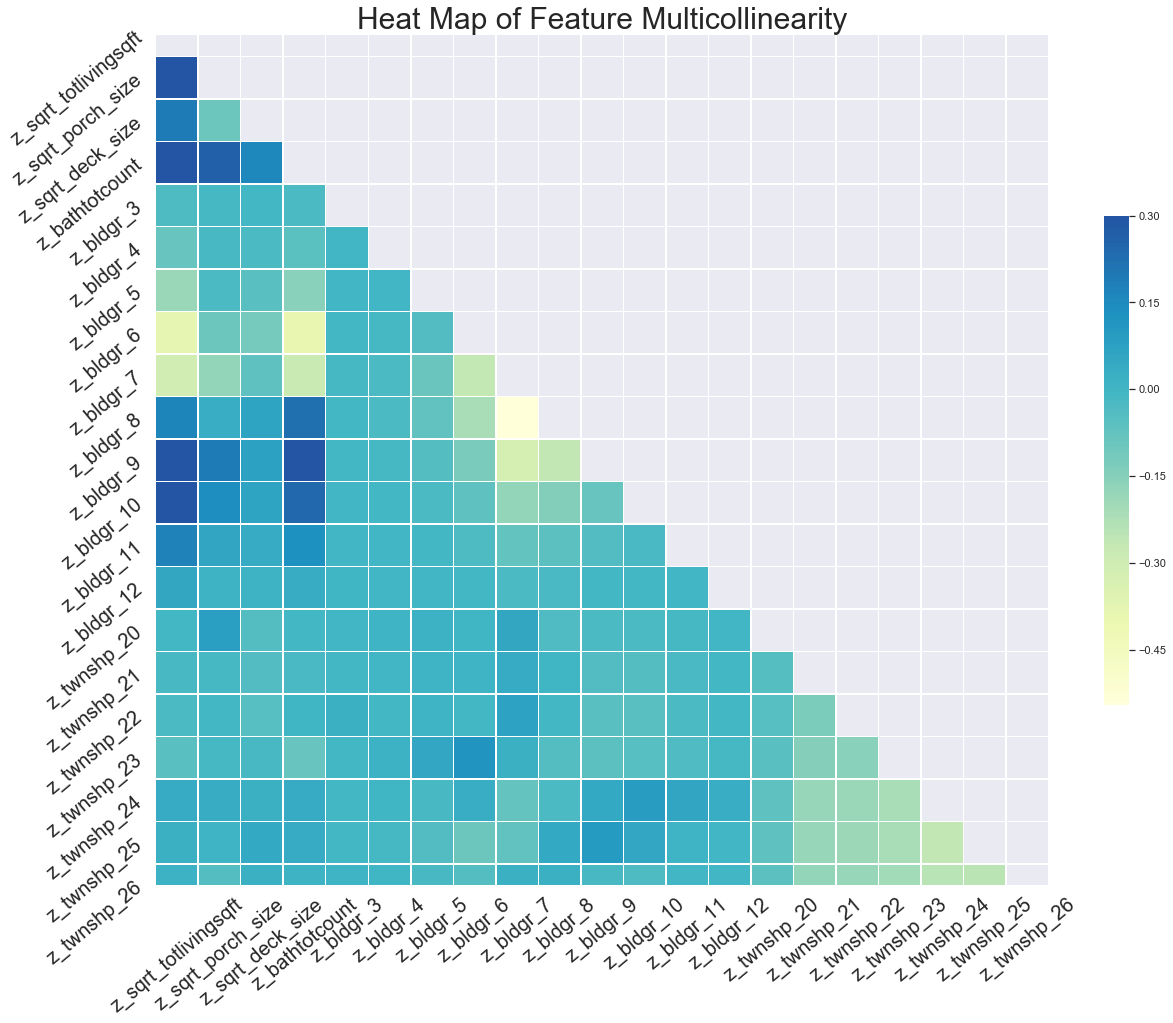

In [39]:
### Turn this into a function!!
copy = features20.copy()
copy.remove('z_saleprice')
x_features20 = copy

df_x_feats = df.loc[:, x_features20]

x_corrs = df_x_feats.corr()

mask = np.triu(np.ones_like(x_corrs, dtype=np.bool))
f, ax = plt.subplots(figsize = (20, 18))
sns.heatmap(x_corrs, mask = mask, cmap="YlGnBu", vmax = 0.3, 
            center = 0, square = True, linewidths = 0.5, 
            cbar_kws = {'shrink': 0.5})
ax.tick_params(axis='both', which='major', labelsize=20, labelrotation = 40)
ax.set_title('Heat Map of Feature Multicollinearity', fontsize = 30)

As expected, we have the same heat map.

In [40]:
# add z-scores of transformed data to dataframe
df.to_csv('../leana_m6')